In [2]:
# import modules and packages
import numpy as np # for organising data into arrays
import pandas as pd # for organising data into dataframes
import matplotlib.pyplot as plt # for plotting data
import seaborn as sns # for plotting data
import random # for shuffling data
from scipy import stats # for linear regression
from sklearn.decomposition import PCA # for PCA
from sklearn.manifold import TSNE # for TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Importing Data

We will now import the data from the csv file. We are doing this to acesss our data through python. We will be using `Pandas` as it structures our data well, and also gives us many other Data manipulation features which provides us a great tool for Data Munging.

In [3]:
# read the csv file to work with the data
# data is 8400 100 px by 100 px images, orignally 84000 images of 200 px by 200 px
# store data as pandas dataframe to make data munging easier
ASL_data = pd.read_csv('grayscale_ASL_pixels.csv')

# Check the data-type for our object, it should be a pandas Dataframe
print(type(ASL_data))

<class 'pandas.core.frame.DataFrame'>


# Exploratory Analysis and Transforming the Data

In this section we will performing Exploratory Analysis and Transforming. We Do EDA to get better understanding of the data, it helps us get familiar with the data. we will be doing things like plotting the data, and taking insights too. Data will be transformed to make it easy to work with and also make sure it runs through our processes.

In [4]:
# Examine the Data

# Look at the Head and tail of the data

print("Head of the Data:")
print(ASL_data[['Image', 'Target', 'Pixel_1',  'Pixel_2', 'Pixel_9998', 'Pixel_9999', 'Pixel_10000']].head())

print("Tail of the Data:")
print(ASL_data[['Image', 'Target', 'Pixel_1',  'Pixel_2', 'Pixel_9998', 'Pixel_9999', 'Pixel_10000']].tail())

print() # new line

# Check data-types of the columns
print(type(ASL_data["Pixel_10000"][1]))
print(type(ASL_data["Pixel_5078"][1]))
print(type(ASL_data["Target"][1]))



Head of the Data:
       Image Target  Pixel_1  Pixel_2  Pixel_9998  Pixel_9999  Pixel_10000
0     A1.jpg      A       30       30          87          89           59
1    A10.jpg      A       31       30          87          88           59
2   A100.jpg      A       31       31          87          87           60
3  A1000.jpg      A       31       30          88          89           60
4  A1001.jpg      A       31       36         106         109           70
Tail of the Data:
          Image Target  Pixel_1  Pixel_2  Pixel_9998  Pixel_9999  Pixel_10000
8695  Z1264.jpg      Z       30       35          84          85           58
8696  Z1265.jpg      Z       31       34          81          85           58
8697  Z1266.jpg      Z       32       33          81          84           58
8698  Z1267.jpg      Z       32       34          81          83           58
8699  Z1268.jpg      Z       29       34          82          85           59

<class 'numpy.int64'>
<class 'numpy.int64'>
<

We don't necessarily need the Image columns so we can get rid of it, it isn't providing us any information as it's just the file name of the image from our dataset that we reduced to a subset.

In [5]:
# rename Images column to "ImgFile"
ASL_data = ASL_data.rename(columns={'Image': 'ImgFile'})

# Check if column name was changed
print("Renamed column name data:")
print(ASL_data.head())

# Eliminate the Image column from our dataset
ASL_data = ASL_data.drop(columns = ['ImgFile'])

# Check if column was dropped or not
print("Data without ImgFile:")
print(ASL_data.head())

Renamed column name data:
     ImgFile Target  Pixel_1  Pixel_2  Pixel_3  Pixel_4  Pixel_5  Pixel_6  \
0     A1.jpg      A       30       30       31       31       32       32   
1    A10.jpg      A       31       30       31       32       31       31   
2   A100.jpg      A       31       31       31       32       30       30   
3  A1000.jpg      A       31       30       31       32       31       32   
4  A1001.jpg      A       31       36       37       37       36       37   

   Pixel_7  Pixel_8  ...  Pixel_9991  Pixel_9992  Pixel_9993  Pixel_9994  \
0       33       33  ...          89          90          90          89   
1       32       32  ...          90          90          89          88   
2       32       34  ...          89          89          88          88   
3       31       34  ...          91          91          91          91   
4       37       36  ...          98          99          99         100   

   Pixel_9995  Pixel_9996  Pixel_9997  Pixel_9998  Pix

We can now see that the column named `Image` isn't in the dataset, we have succesfully deleted the data.

The other columns we have are:

- Target(str): Which represents the Letter our data is representing
- Pixel_n(int): These are the pixel values which are represented in a range from `0 to 255`, which is going from `Black` to `White`. The `"n"` represents the number of the pixel in 100px by 100px image.

It is always good too look at our data as a whole to get an idea of the so called border cases of the data. It also helps with respect to the use case to see the central tendancies and standar deviation of the data.

In [6]:
print(ASL_data.describe())

           Pixel_1      Pixel_2      Pixel_3      Pixel_4      Pixel_5  \
count  8700.000000  8700.000000  8700.000000  8700.000000  8700.000000   
mean     31.087586    34.860230    35.651379    35.623218    35.224253   
std       0.687301     1.353492     1.618792     1.549910     1.607027   
min      29.000000    30.000000    30.000000    30.000000    29.000000   
25%      31.000000    34.000000    35.000000    35.000000    34.000000   
50%      31.000000    35.000000    36.000000    35.000000    35.000000   
75%      31.000000    36.000000    37.000000    37.000000    36.000000   
max      34.000000    48.000000    49.000000    49.000000    49.000000   

           Pixel_6      Pixel_7      Pixel_8      Pixel_9     Pixel_10  ...  \
count  8700.000000  8700.000000  8700.000000  8700.000000  8700.000000  ...   
mean     35.188276    35.369655    35.354253    35.501494    35.727011  ...   
std       1.556818     1.494873     1.459347     1.475982     1.634095  ...   
min      29.00000

This summary doesn't give us any real insight but we can still look at pixel intensity range.

We will now make convert our pandas Dataframe into a numpy `ndarray` which makes it easier to hande our data. We also must seperate our targets to make sure they are used to help our classifiers make decision.

In [7]:
# convert data into numpy ndarray, only take the pixel columns
data = ASL_data.iloc[:, 1:].to_numpy()
target = ASL_data.iloc[:, 0].to_numpy()

# check shape of data to see if data has been formatted properly
print(type(data))
print(data.shape)

print(type(target))
print(target.shape)


<class 'numpy.ndarray'>
(8700, 10000)
<class 'numpy.ndarray'>
(8700,)


We need to get the data into an even more concise format that will make sense, which is a `2D ndarray`, this is intuitive as it will show that the data is 100px by 100px. We do not need the data to be in 2D for classification problems but we can use the bitmap array to visulie how our data looks

In [8]:
# Reshape each row to 100px by 100px images and store in a new array
images = data.reshape(-1, 100, 100)

# check shape of data to see if data had been reshaped
print(type(images))
print(images.shape)

<class 'numpy.ndarray'>
(8700, 100, 100)


We should visulize the data to see if our reduction of size makes sense. We can do this to see if the image size reduction is appropriate, and can still help classify data.

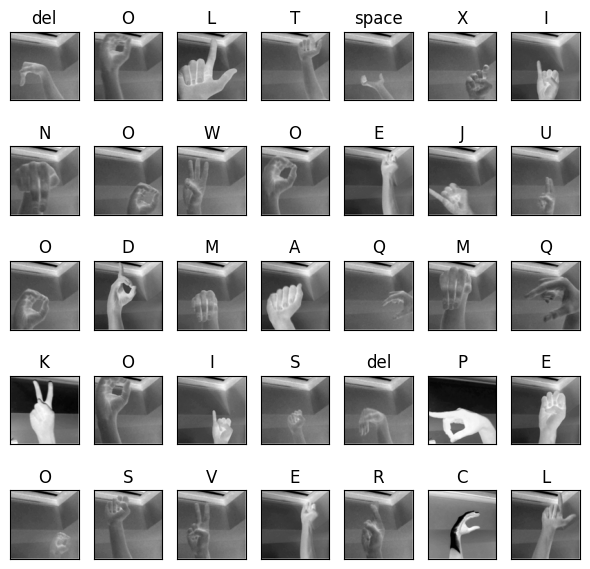

In [9]:
# set our axes objects, we will be ploting 35 plots to take a look at the images
figure, axes = plt.subplots(nrows=5, ncols=7, figsize=(6, 6))
random_images = random.sample(range(0, images.shape[0]), 35)

# Using image_index to access images and target arrays
for axes, image_index in zip(axes.ravel(), random_images):
    axes.imshow(images[image_index], cmap=plt.cm.gray_r) # Access image using index
    axes.set_xticks([]) # remove x-axis tick marks
    axes.set_yticks([]) # remove y-axis tick marks
    axes.set_title(target[image_index]) # Access target using index

plt.tight_layout()
plt.show()

We can now go ahead and do some other plots. We start of with a Linear regression plot from `scipy`. We will try to see if there is any relation with pixel that are nearby and by ones that are far away.

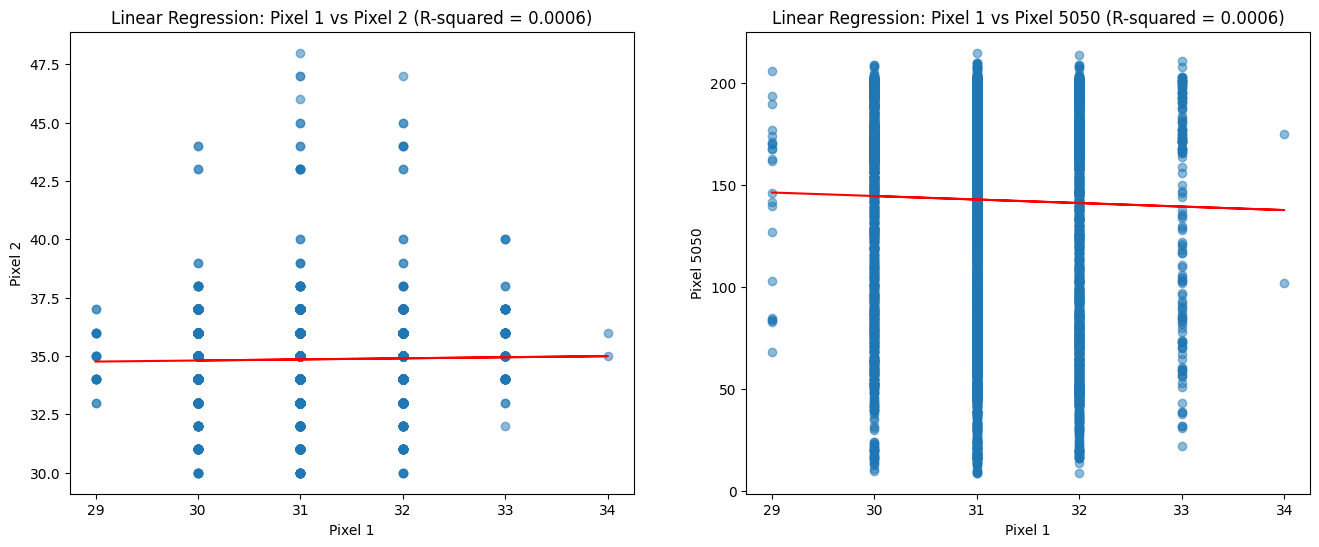

In [10]:
# Example: Linear regression between Pixel_1 and Pixel_10000
pixel_1 = data[:, 0]
pixel_2 = data[:, 1]

slope, intercept, r_value, p_value, std_err = stats.linregress(pixel_1, pixel_2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns of subplots


ax1.scatter(pixel_1, pixel_2, alpha=0.5)
ax1.plot(pixel_1, slope * pixel_1 + intercept, color='red')
ax1.set_xlabel("Pixel 1")
ax1.set_ylabel("Pixel 2")
ax1.set_title(f"Linear Regression: Pixel 1 vs Pixel 2 (R-squared = {r_value**2:.4f})")

# Example using a different pair of pixels
pixel_5050 = data[:, 5049]

slope, intercept, r_value, p_value, std_err = stats.linregress(pixel_1, pixel_5050)


ax2.scatter(pixel_1, pixel_5050, alpha=0.5)
ax2.plot(pixel_1, slope * pixel_1 + intercept, color='red')
ax2.set_xlabel("Pixel 1")
ax2.set_ylabel("Pixel 5050")
ax2.set_title(f"Linear Regression: Pixel 1 vs Pixel 5050 (R-squared = {r_value**2:.4f})")

plt.show() # Display both plots together

We an clearly see that these plots do not give any real insights, but we can always test them to see if there is any relation. From the above plots we can see that their corellation coefficients are very close to zero showing almost no correlation, but when we take a look at the plots we can clearly see that for some reson the values line up in a vertical line. The data probably lies on that line due to the fact that discrete they are discrete values. We can try doing a frequency plot for this which plots the frequency of all the pixels to better understand what pixels are present in what numbers in the images.

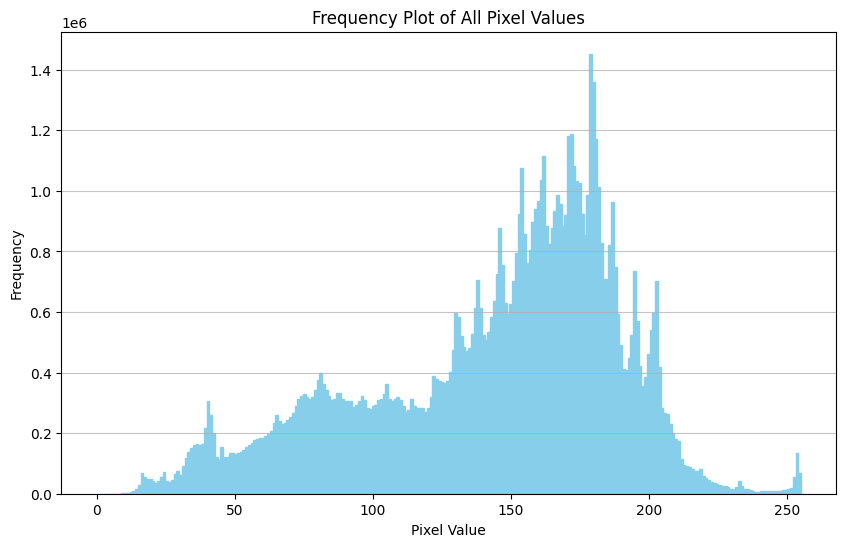

In [11]:
# Flatten the images array to get a 1D array of all pixel values
flat_pixels = data.flatten()

# Create the frequency plot
plt.figure(figsize=(10, 6))
plt.hist(flat_pixels, bins=256, range=(0, 255), color='skyblue', edgecolor='skyblue')
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.title("Frequency Plot of All Pixel Values")
plt.grid(axis='y', alpha=0.75)
plt.show()

We can clearly see that the plot is showing us the composition of pixel values. The pixel values that are between `125` to `200` are found more in the image, this is probably because of the hand, which seems to be brighter after looking at our image plots above.

We can now trying performing Dimensionality reduction on this to understand the variability in the data. This can also help us identify the number of groups present. If done correctly we should see around 28 groups. `PCA` and `TSNE` are popular dimensionality reduction techniques that will help us to understand variation in data with many features.

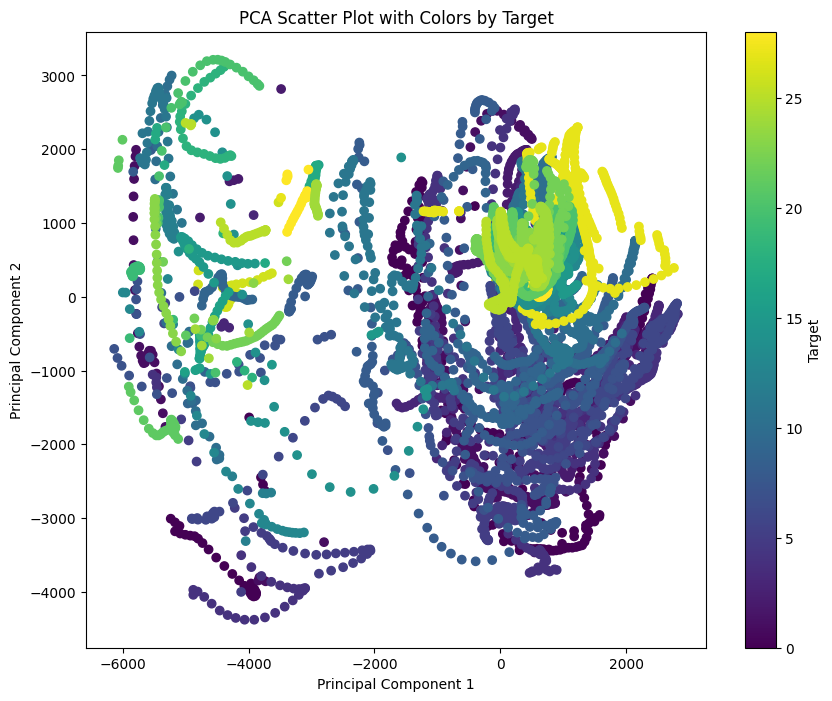


Explained Variance Ratios: [0.24926088 0.13956366]


In [12]:
pca = PCA(n_components=2, random_state=34255)  # set up pca
pca.fit(data)

ASL_xf = pca.transform(data)
ASL_xf_df = pd.DataFrame(ASL_xf)

# Add the Target column to the transformed dataframe for color mapping
ASL_xf_df['Target'] = target

# Create a scatter plot with colors based on the 'Target' column
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to your target data and transform it, done to produce different colors
ASL_xf_df['Target_encoded'] = le.fit_transform(ASL_xf_df['Target'])

# Now use the encoded target for color mapping
scatter = plt.scatter(ASL_xf_df[0], ASL_xf_df[1], c=ASL_xf_df['Target_encoded'], cmap='viridis')

# Add a colorbar to show the mapping of colors to targets
plt.colorbar(scatter, label='Target')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot with Colors by Target')
plt.show()

# Explained variance ratio
print() # new line
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance_ratio)


From this plot we can tell that the data is a bit scattered and there are no obvious patterns, we can now try another method `TSNE` to see if it gives us better results. Also the combinations of these two PCs isn't too great for plotting since PC captures only **24.92%** variability and PC2 capture an even less amount of **13.95%**, together they account for **38.87%** variability.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


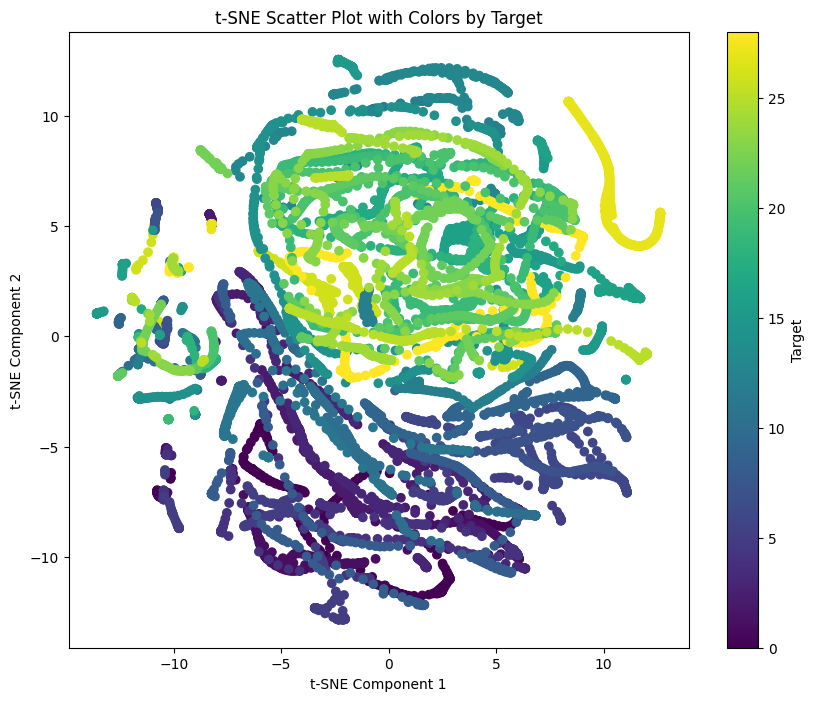

In [13]:
# Now perform TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300) # Adjust perplexity and n_iter as needed
tsne_results = tsne.fit_transform(data)

tsne_df = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
tsne_df['Target'] = target

# Encode the target for color mapping
le = LabelEncoder()
tsne_df['Target_encoded'] = le.fit_transform(tsne_df['Target'])

plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_df['tsne1'], tsne_df['tsne2'], c=tsne_df['Target_encoded'], cmap='viridis')
plt.colorbar(scatter, label='Target')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Scatter Plot with Colors by Target')
plt.show()

`TSNE` just like it's counterpart has similar problems. This is evident since there are **10,000** dimensions, and it would be a very hard to capture them in 2 PCs

This concludes the EDA for this data, we can now move into our Classification tasks with a Convolutionary Neural Network(CNN) and K-Nearest Neighbors Classifier

# Convolutionary Neural Network(CNN)


A Convolutional Neural Network (CNN) is a type of deep learning model specifically designed for processing structured grid-like data, such as images. It uses layers of convolutional filters to automatically extract features, like edges or textures, and processes them hierarchically to recognize patterns for tasks like image classification, object detection, or segmentation.

In [14]:
le = LabelEncoder()
target_encoded = le.fit_transform(target)

# Reshape the images to include the channel dimension (grayscale)
images = images.reshape(-1, 100, 100, 1)

# Normalize pixel values 0 to 1 values work better with CNN
images = images / 255.0

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    images, target_encoded, test_size=0.2, random_state=42
)

# Define the CNN model
model = Sequential()

model.add(Conv2D(128, kernel_size=(5, 5), strides=1, padding='same', activation='relu', input_shape=(100, 100, 1)))
model.add(MaxPool2D(pool_size=(3, 3), strides=2, padding='same'))
model.add(Conv2D(64, kernel_size=(2, 2), strides=1, activation='relu', padding='same'))
model.add(MaxPool2D((2, 2), 2, padding='same'))
model.add(Conv2D(32, kernel_size=(2, 2), strides=1, activation='relu', padding='same'))
model.add(MaxPool2D((2, 2), 2, padding='same'))
model.add(Flatten())

# Adjust the number of units in the first Dense layer
# to match the output shape of the Flatten layer
model.add(Dense(units=5408, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=24, activation='softmax'))

num_classes = len(np.unique(target_encoded)) + 1 # +1 to avoid error
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
218/218 ━━━━━━━━━━━━━━━━━━━━ 476s 2s/step - accuracy: 0.0400 - loss: 3.4108 - val_accuracy: 0.0253 - val_loss: 3.4023
Epoch 2/5
218/218 ━━━━━━━━━━━━━━━━━━━━ 487s 2s/step - accuracy: 0.0397 - loss: 3.3920 - val_accuracy: 0.0253 - val_loss: 3.3907
Epoch 3/5
218/218 ━━━━━━━━━━━━━━━━━━━━ 513s 2s/step - accuracy: 0.0358 - loss: 3.3863 - val_accuracy: 0.0253 - val_loss: 3.3845
Epoch 4/5
218/218 ━━━━━━━━━━━━━━━━━━━━ 488s 2s/step - accuracy: 0.0352 - loss: 3.3800 - val_accuracy: 0.0253 - val_loss: 3.3810
Epoch 5/5
218/218 ━━━━━━━━━━━━━━━━━━━━ 506s 2s/step - accuracy: 0.0363 - loss: 3.3774 - val_accuracy: 0.0253 - val_loss: 3.3788
55/55 ━━━━━━━━━━━━━━━━━━━━ 24s 438ms/step - accuracy: 0.0292 - loss: 3.3785
Test Loss: 3.3788
Test Accuracy: 0.0253


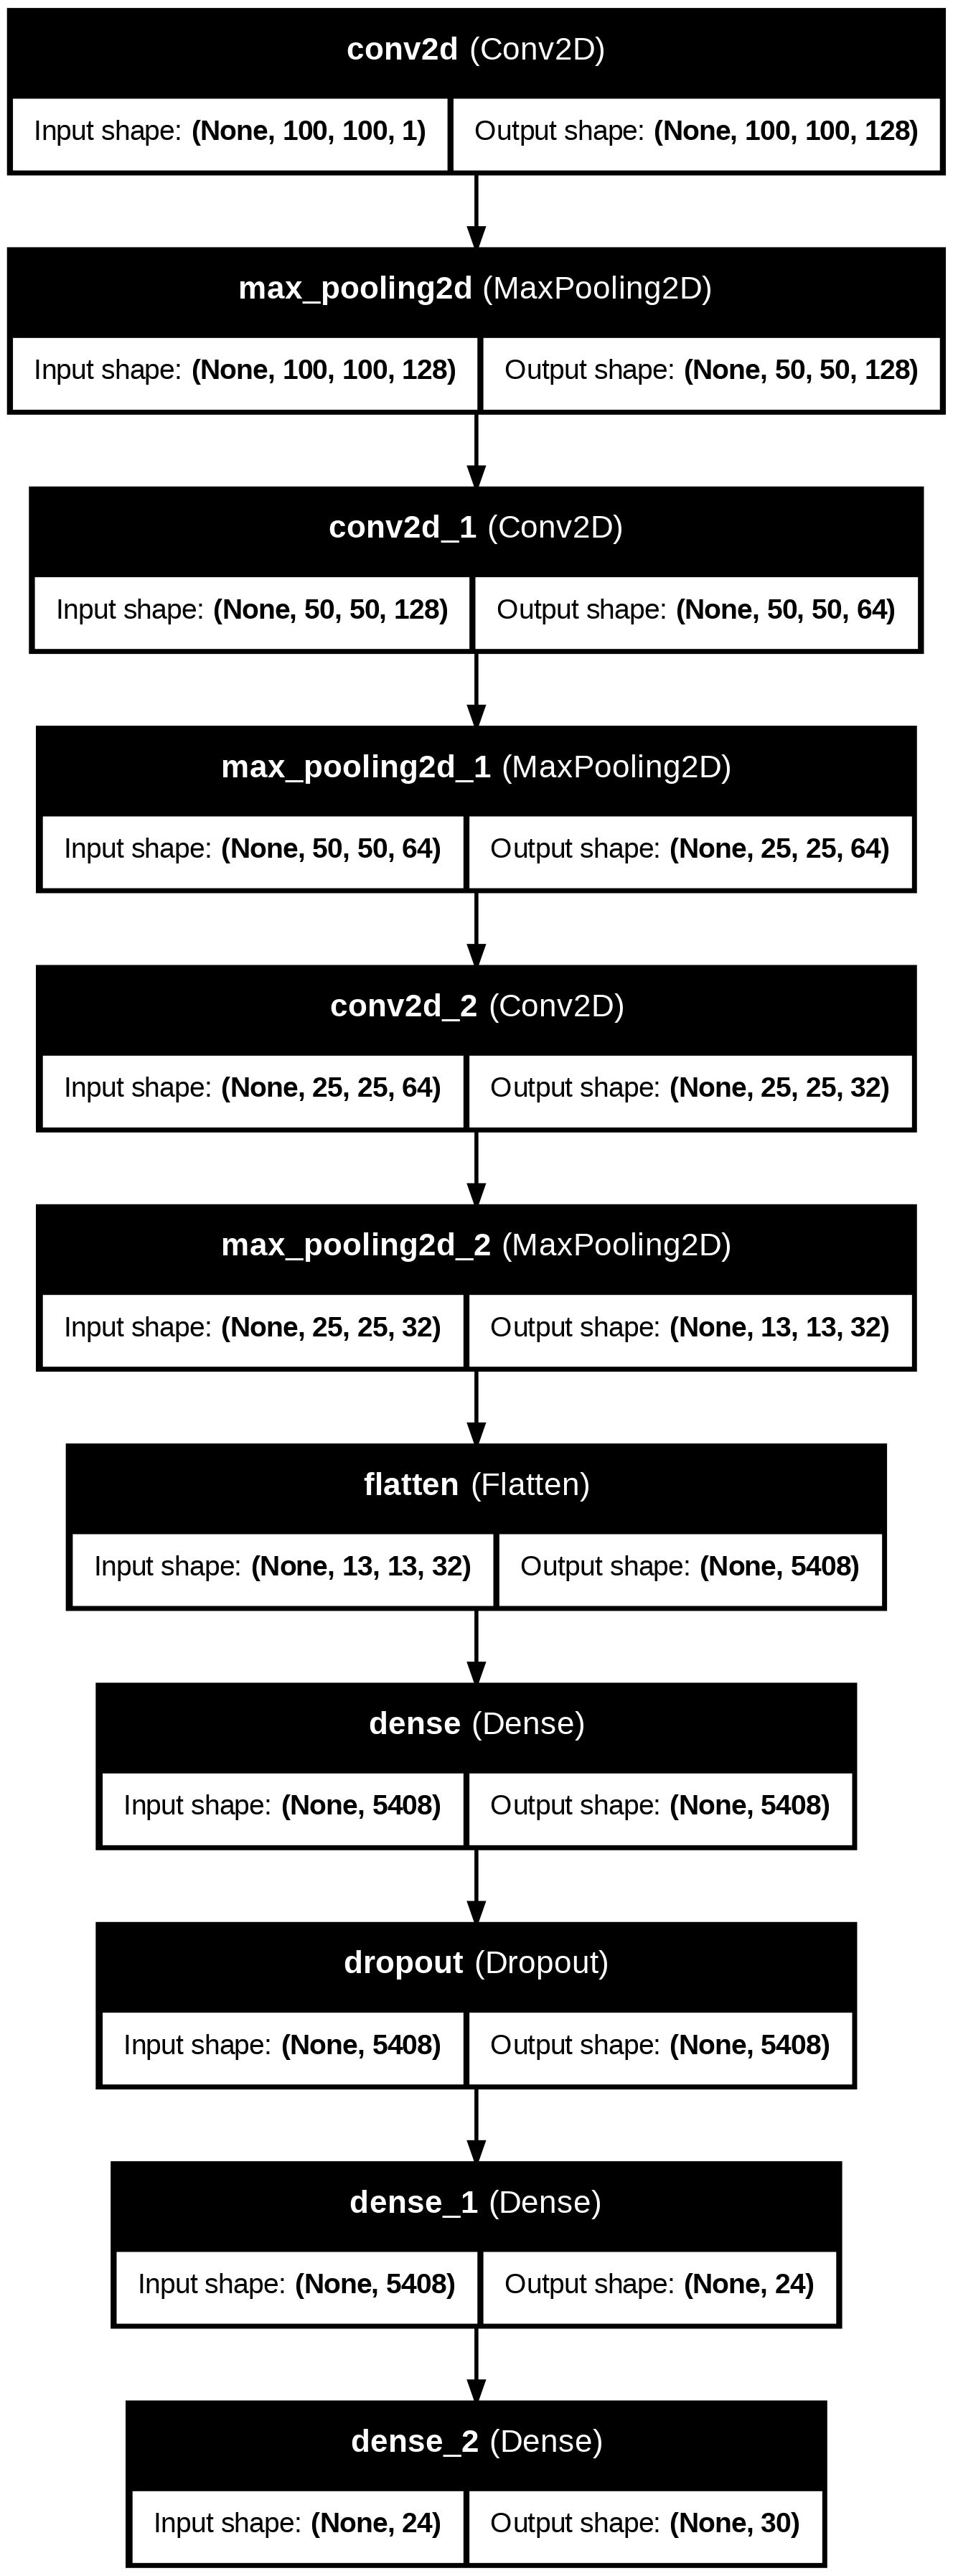

In [15]:

plot_model(model, to_file='convnet.png', show_shapes=True,
           show_layer_names=True)
Image(filename='convnet.png')

55/55 ━━━━━━━━━━━━━━━━━━━━ 25s 450ms/step


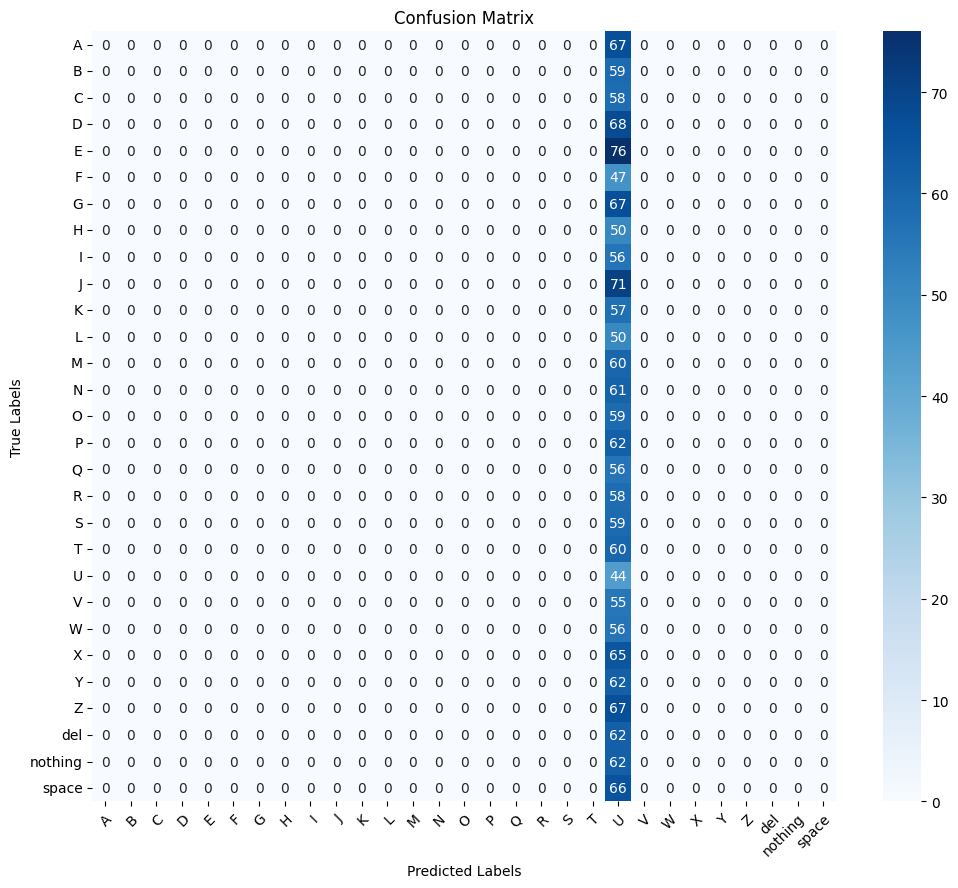

In [16]:
# Predict with model

predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Get unique target labels for x and y axes
target_names = le.classes_

# Plot the confusion matrix with target names
plt.figure(figsize=(12, 10))  # Adjust size if needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')  # Rotate x-axis labels if needed
plt.show()

After looking at the accuracy we can clearly see that CNNs require a lot of experience to know how to predict. We can use transfer learning to make our CNNs predict better, these are pre-trained models that can be used to make better predictions.

We can always try to use other models to predict our data, like the K-Nearest Neighbour We will also be using KFold to do Hyperparameter tuning.

Fold Accuracy: 0.9619252873563219
Fold Accuracy: 0.9647988505747126
Fold Accuracy: 0.9576149425287356
Fold Accuracy: 0.9597701149425287
Fold Accuracy: 0.9454022988505747
Average KNN Accuracy (KFold): 0.9579022988505747
Test Accuracy: 0.9747126436781609


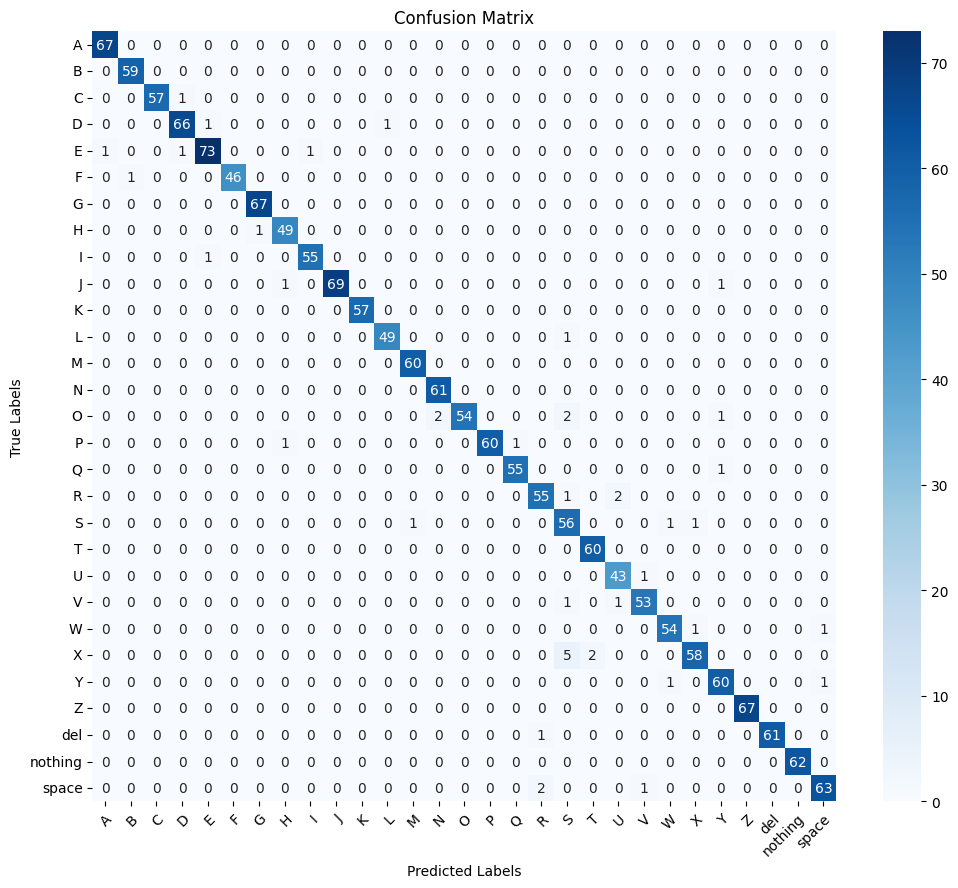

In [17]:
le = LabelEncoder()
target_encoded = le.fit_transform(target)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data, target_encoded, test_size=0.2, random_state=42
)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

# Store accuracy scores for each fold
accuracy_scores = []

# Perform KFold cross-validation
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Train the model on the training fold
    knn.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation fold
    y_pred_fold = knn.predict(X_val_fold)

    # Calculate accuracy for the fold
    accuracy_fold = accuracy_score(y_val_fold, y_pred_fold)
    accuracy_scores.append(accuracy_fold)
    print(f"Fold Accuracy: {accuracy_fold}")

# Calculate average accuracy across all folds
average_accuracy = np.mean(accuracy_scores)

print(f"Average KNN Accuracy (KFold): {average_accuracy}")

# Train on the entire training set and evaluate on the test set
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Accuracy for test we did
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

cm = confusion_matrix(y_test, y_pred)

# Get unique target labels for x and y axes
target_names = le.classes_  # Assuming le is your LabelEncoder object

# Plot the confusion matrix with target names
plt.figure(figsize=(12, 10))  # Adjust size if needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')  # Rotate x-axis labels if needed
plt.show()